<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202510_AML/blob/main/Laboratorios/Laboratorio%202/Sesión%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

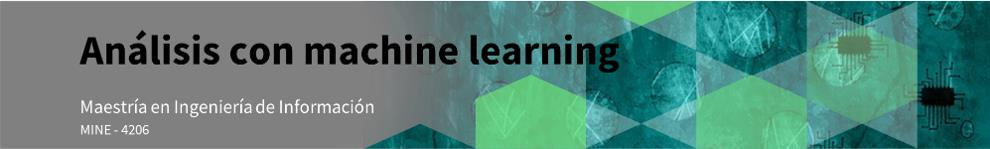

**Tutores**.
* Nicolás Tibatá Casteñeda.
* Fabián Camilo Castellanos P.

#Tabla de contenido

[Contexto y objetivos.](scrollTo=opGTmPf8s2Fw)<br>
[Entendimiento del negocio.](#scrollTo=DOkcUScIu2VX)<br>
[0. Instalación de librerías.](#scrollTo=j-M4bk-eBFw-)<br>
[1. Importar librerías](#scrollTo=s90KOHNvxPWi)<br>
[2. Introducción a los datos.](#scrollTo=LMUySTJvvJq1)<br>
[3. Modelamiento.](#scrollTo=kdDLH6BKv839)<br>
[4. Preguntas.](#scrollTo=mVxgC4xqyND9)<br>

---
# Contexto y objetivos.

El auge que ha tenido el turismo junto con la pandemia han generado un incremento y renovación de las experiencias que tienen los consumidores ocasionales para cadenas hoteleras como también para la gastronomía.

Una importante cadena de restaurantes ha crecido con su oferta de la carta con sus clientes, aún así los inversionistas consideran que al ofrecer una experiencia complementada con vino puede aumentar sus ingresos, por esta razón ha contratado a la universidad de los Andes con el fin de estudiar la calidad de 2 tipos de vino que complementan con la proteína como lo es la carne roja y el pescado, por esta razón se ha enfocado en vino blanco y vino rojo.

**Objetivos:**
- Construir un modelo de clasificación con Regresión Logística
- Determinar las métricas de los modelos de clasificación
- Realizar busqueda de hiperparámetros basado en métricas y gráficas.

La fuente de los datos la puedes encontrar en [Original Wine Quality](https://www.kaggle.com/datasets/futurezz/original-wine-quality).



# Entendimiento del negocio.

Para tener un mejor detalle sobre el comportamiento de las variables, solicitamos a la organización el diccionario de datos y nos suministró la siguiente información:

|Variables | Description|
|---|:|
| fixed acidity | **Acidez fija**, la mayoría de los ácidos presentes en el vino son fijos o no volátites (no se evaporan fácilmente).|
| volatile acidity | **Acidez volátil**, Cantidad de ácido acético en el vino, los cuáles en niveles demasiavo altos pueden generar un sabor desagradable, tipo vinagre.|
| citric acid | **Ácido cítrico**, cantidad que puede aportar "frescura" y sabor al vino.|
| residual sugar | **Azúcar residual**, cantidad de azúcar que queda después que la fermentacion se ha detenido.|
| chlorides | **Cloruros**, corresponde a la cantidad de sal en el vino.|
| free sulfur dioxide | **Dióxido libre de azufre**, la forma libre de SO$_2$| existe en equilibrio con el SO$_2$| molecular (como gas disuelto) y el ion bisulfito.
| total sulfur dioxide | **Dióxido de azufre total** , cantidad de formas libres y unidas de SO$_2$; en bajas concentraciones, el SO$_2$ es prácticamente indetectable en el vino, pero en concentraciones superiores a 50 ppm es perceptible en el aroma y el sabor del vino.|
| density | **Densidad**, la densidad del vino es cercana al agua, dependiendo del porcentaje de alcohol y contenido de azúcar.|
| pH | Indicador de qué tan ácido o básico es un vino, los valores van desde 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos tienen PH entre 3 a 4.|
| sulphates | **Sulfatos**, es un aditivo del vino que puede contribuir a los niveles de gas dióxido de azufre (SO$_2$), el cuál actúa como un antimicrobiano y antioxidante.|
| alcohol | Porcentaje de alcohol en el vino.|
| quality | **Calidad**, variable objetivo, corresponde a datos de calificación que van desde 0 dónde la calidad es muy mala hasta 10 dónde la calidad es muy buena.|




---
# 0. Instalación de librerías.

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 21.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=32b9a5051dafdac0fa81ab23ec131bffde7084302085ec47f65e3073f00a2f88
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


---
# 1. Importar librerías

In [ ]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer,  OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay, roc_curve, roc_auc_score

#Librerías extras
import itertools

---
# 2. Introducción a los datos.

### 2.1. Parámetros generales y carga de la información.

In [ ]:
#Porcentaje para validación y test
test_val_alpha = 0.2
#random_state o semilla para la reproducibilidad
my_seed = 19

In [ ]:
url = 'https://raw.githubusercontent.com/fcastellanosp/MINE-4206_202510_AML/refs/heads/main/Laboratorios/Laboratorio%202/Datos/S1/winequality-red.csv'
data_w = pd.read_csv(url)
data_w["type"] = "red"

Utilizaremos `data_w.describe()` para obtener una descripción de las variables numéricas del conjunto de datos. Ten en cuenta que esta función también incluye variables categóricas con clases numéricas.

In [ ]:
data_w.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Verificamos si la información fue cargada correctamente en el pandas dataframe:

In [ ]:
data_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
url = 'https://raw.githubusercontent.com/fcastellanosp/MINE-4206_202510_AML/refs/heads/main/Laboratorios/Laboratorio%202/Datos/S1/winequality-white.csv'
data_r = pd.read_csv(url)
data_r["type"] = "white"

Hacemos lo mismo con el vino rojo:

In [ ]:
data_r.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
data_r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


Generamos un único pandas dataframe:

In [ ]:
data = pd.concat([data_r, data_w])
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


Podemos observar la distribución de la variable categórica de nuestros datos:

In [ ]:
pd.value_counts(data['type'])

<ipython-input-11-4058bd3522a1>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['type'])


,count
type,
white,4898
red,1599


De acuerdo con la organización, en el diccionario de dataos pudimos ver que quality es una variable que requiere transformación de la información, los valores hasta 5 indicarán calidad baja catalogados como cero y los restantes con valor 1.

In [ ]:
def set_wine_quality(X):
  return np.where(X <= 5, 0, 1)

In [ ]:
data["quality"] = data['quality'].apply(set_wine_quality)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,red


### 2.2. Separación de la información.

### 2.2.1. Entrenamiento y test.

Separamos los datos de entrenamiento y test (20%), junto con el parámetro de reproducibilidad o semilla (`random_state`):

In [ ]:
train, test = train_test_split(data, test_size=test_val_alpha, random_state=my_seed, stratify=data["type"])
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
316,9.6,0.56,0.23,3.4,0.102,37.0,92.0,0.99960,3.30,0.65,10.1,0,red
4066,7.1,0.44,0.27,8.4,0.057,60.0,160.0,0.99257,3.16,0.36,11.8,1,white
1599,6.7,0.33,0.49,1.6,0.167,20.0,94.0,0.99140,3.11,0.50,11.4,1,white
692,6.0,0.36,0.16,6.3,0.036,36.0,191.0,0.99420,3.17,0.62,9.8,0,white
2723,7.5,0.26,0.25,1.7,0.038,29.0,129.0,0.99312,3.45,0.56,10.4,1,white


## 2.3. Exploración de los datos.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5197 entries, 316 to 563
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5197 non-null   float64
 1   volatile acidity      5197 non-null   float64
 2   citric acid           5197 non-null   float64
 3   residual sugar        5197 non-null   float64
 4   chlorides             5197 non-null   float64
 5   free sulfur dioxide   5197 non-null   float64
 6   total sulfur dioxide  5197 non-null   float64
 7   density               5197 non-null   float64
 8   pH                    5197 non-null   float64
 9   sulphates             5197 non-null   float64
 10  alcohol               5197 non-null   float64
 11  quality               5197 non-null   int64  
 12  type                  5197 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 568.4+ KB


In [ ]:
ProfileReport(train)

Output hidden; open in https://colab.research.google.com to view.

## 2.4. Insights obtenidos de la información.

**Del anterior proceso podemos concluir:**

* Las variables *fixed acidity*, *volatile acidity*, *citric acid*, *pH* tienen tendencia a una distribución normal.
* Las variables *alcohol*, *sulphates*, *density*, *free sulfur dioxide* podrían acercarse a comportarse como una distribución normal.
* La variable *total sulfur dioxide* tiene una distribución binomial.
* La variable objetivo *quality* muestra que no hay un vino perfecto, los mejores calificados están valorados con 8 sobre 10.
* Contamos con más registros de vino blanco de que vino rojo.

**Posibles decisiones sobre la información:**
* 12.5% de la información es duplicada, es necesario borrar esta información.
* A pesar que la variable *citric acid* tiene valores cero, no significa que no tengan un significado, mantendremos estos datos.
* Al reclasificar no veremos un desbalanceo en los datos.

## 2.5. Preparación de los datos.

Generamos una copia de la información:

In [ ]:
new_train = train.copy()

Verificamos el porcentaje de ausencias en las columnas como un porcentaje:

In [ ]:
print(round(100*(new_train.isnull().sum()/len(new_train.index)), 2))
print(len(new_train.columns))

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
type                    0.0
dtype: float64
13


De acuerdo a los [insights](#scrollTo=BVj1TrCfwp-x), procedemos a borrar las columnas correspondientes:

In [ ]:
new_train = train.copy()
new_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
316,9.6,0.56,0.23,3.4,0.102,37.0,92.0,0.99960,3.30,0.65,10.1,0,red
4066,7.1,0.44,0.27,8.4,0.057,60.0,160.0,0.99257,3.16,0.36,11.8,1,white
1599,6.7,0.33,0.49,1.6,0.167,20.0,94.0,0.99140,3.11,0.50,11.4,1,white
692,6.0,0.36,0.16,6.3,0.036,36.0,191.0,0.99420,3.17,0.62,9.8,0,white
2723,7.5,0.26,0.25,1.7,0.038,29.0,129.0,0.99312,3.45,0.56,10.4,1,white


Borramos la información duplicada:

In [ ]:
print("------------------------TRAIN------------------------")
print(f"El número de registros antes de borrar duplicados es: {new_train.shape[0]}")
new_train = new_train.drop_duplicates()
print(f"El número de registros después de borrar duplicados es: {new_train.shape[0]}")

------------------------TRAIN------------------------
El número de registros antes de borrar duplicados es: 5197
El número de registros después de borrar duplicados es: 4428


Hacemos lo mismo con test:

In [ ]:
print("------------------------TEST------------------------")
print(f"El número de registros antes de borrar duplicados es: {test.shape[0]}")
test = test.drop_duplicates()
print(f"El número de registros después de borrar duplicados es: {test.shape[0]}")

------------------------TEST------------------------
El número de registros antes de borrar duplicados es: 1300
El número de registros después de borrar duplicados es: 1251


Ahora revisemos cada una de las variables dentro de nuestro modelo

<ipython-input-22-4e5cd876fed3>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s1.set_xticklabels(s1.get_xticklabels(),rotation=45)


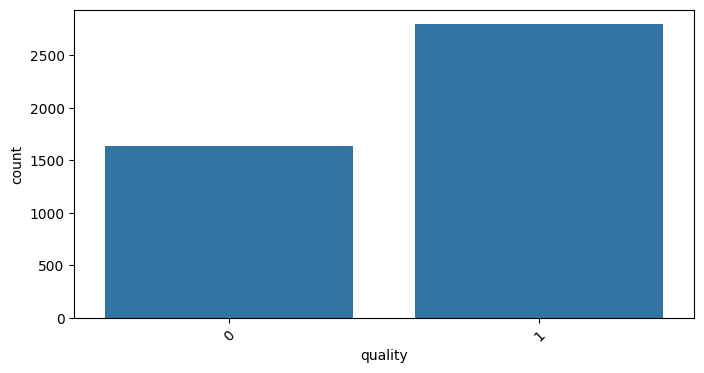

In [ ]:
# Lead Origin
plt.figure(figsize=(8, 4))
s1=sns.countplot(new_train, x='quality')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

<ipython-input-23-a5b3f0b706d5>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s1.set_xticklabels(s1.get_xticklabels(),rotation=45)


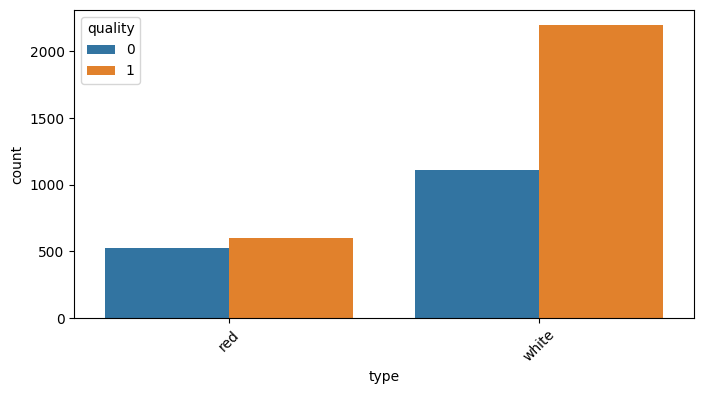

In [ ]:
# Lead Origin
plt.figure(figsize=(8, 4))
s1=sns.countplot(new_train, x='type', hue='quality')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

## 2.6 Funciones complementarias.

Visualización de una matriz de confusión:

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,size=(8,8)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

---
# 3. Modelamiento.

In [ ]:
target_feature = 'quality'
X_train, Y_train = new_train.drop([target_feature], axis=1), new_train[target_feature]
display(X_train)
display(Y_train)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
316,9.6,0.56,0.23,3.4,0.102,37.0,92.0,0.99960,3.30,0.65,10.100000,red
4066,7.1,0.44,0.27,8.4,0.057,60.0,160.0,0.99257,3.16,0.36,11.800000,white
1599,6.7,0.33,0.49,1.6,0.167,20.0,94.0,0.99140,3.11,0.50,11.400000,white
692,6.0,0.36,0.16,6.3,0.036,36.0,191.0,0.99420,3.17,0.62,9.800000,white
2723,7.5,0.26,0.25,1.7,0.038,29.0,129.0,0.99312,3.45,0.56,10.400000,white
...,...,...,...,...,...,...,...,...,...,...,...,...
4867,5.3,0.60,0.34,1.4,0.031,3.0,60.0,0.98854,3.27,0.38,13.000000,white
4637,6.0,0.24,0.41,1.3,0.036,42.0,118.0,0.99018,3.04,0.64,11.733333,white
4874,5.6,0.20,0.36,2.5,0.048,16.0,125.0,0.99282,3.49,0.49,10.000000,white
1004,5.8,0.36,0.26,3.3,0.038,40.0,153.0,0.99110,3.34,0.55,11.300000,white


,quality
316,0
4066,1
1599,1
692,0
2723,1
...,...
4867,1
4637,1
4874,1
1004,1


Preparamos los datos test:

In [ ]:
X_test, Y_test = test.drop([target_feature], axis=1), test[target_feature]
display(X_test)
display(Y_test)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
727,6.4,0.570,0.02,1.80,0.067,4.0,11.0,0.99700,3.46,0.68,9.5,red
2924,6.6,0.220,0.29,14.40,0.046,39.0,118.0,0.99834,3.05,0.50,9.1,white
1489,6.2,0.570,0.10,2.10,0.048,4.0,11.0,0.99448,3.44,0.76,10.8,red
1429,6.1,0.220,0.49,1.50,0.051,18.0,87.0,0.99280,3.30,0.46,9.6,white
1509,7.9,0.200,0.49,1.60,0.053,15.0,144.0,0.99300,3.16,0.47,10.5,white
...,...,...,...,...,...,...,...,...,...,...,...,...
194,7.6,0.550,0.21,2.20,0.071,7.0,28.0,0.99640,3.28,0.55,9.7,red
794,7.4,0.320,0.27,1.40,0.049,38.0,173.0,0.99335,3.03,0.52,9.3,white
1621,8.9,0.320,0.49,1.60,0.050,17.0,131.0,0.99560,3.13,0.34,9.4,white
4748,6.1,0.340,0.24,18.35,0.050,33.0,184.0,0.99943,3.12,0.61,9.3,white


,quality
727,0
2924,1
1489,1
1429,0
1509,0
...,...
194,0
794,0
1621,0
4748,0


### 3.1 Modelo base de regresión logística

### 3.1.1. Implementación.

Construimos el pipeline para tratamiento de la información:

In [ ]:
#Definimos el transformador numérico, el cuál incluye la imputación de valores ausentes mediante el dato más frecuente:
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ]
)

# Definimos el transformador categórico, el cuál incluye el uso de FunctionTransformer para ajustar los datos de la variable categórica type
cat_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, make_column_selector(dtype_exclude=object)),
        ("cat", cat_transformer, make_column_selector(dtype_include=object))
    ]
)

pipe = Pipeline(steps=[
    ('column_transformer', preprocessor)
])


pipe.fit_transform(X_train)

array([[ 9.6 ,  0.56,  0.23, ..., 10.1 ,  1.  ,  0.  ],
       [ 7.1 ,  0.44,  0.27, ..., 11.8 ,  0.  ,  1.  ],
       [ 6.7 ,  0.33,  0.49, ..., 11.4 ,  0.  ,  1.  ],
       ...,
       [ 5.6 ,  0.2 ,  0.36, ..., 10.  ,  0.  ,  1.  ],
       [ 5.8 ,  0.36,  0.26, ..., 11.3 ,  0.  ,  1.  ],
       [ 7.4 ,  0.3 ,  0.22, ..., 10.4 ,  0.  ,  1.  ]])

Ya tenemos preparados nuestros datos, ensamblamos el Pipeline que transforma los datos y

In [ ]:
%%time
estimators_bm = [
        ('transform', preprocessor),
        ('regression', LogisticRegression())
]

pipe_bm = Pipeline(estimators_bm)

pipe_bm.fit(X_train, Y_train)

CPU times: user 136 ms, sys: 164 ms, total: 300 ms
Wall time: 312 ms


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d32099027d0>),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d321dec6690>)])),
                ('regression', LogisticRegression())])

Verificamos la construcción del pipeline:

In [ ]:
cat_column_names = pipe['column_transformer'].transformers_[1][1][0].get_feature_names_out()
cat_column_names

array(['type_red', 'type_white'], dtype=object)

Las columnas numéricas:

In [ ]:
num_column_names = pipe['column_transformer'].transformers_[0][1].feature_names_in_
num_column_names

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

Todas las columnas del pipeline:

In [ ]:
col_names = list(num_column_names) + list(cat_column_names)
col_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'type_red',
 'type_white']

Veamos de una forma más agradable la información:

In [ ]:
X_train_2_m = pd.DataFrame(pipe.fit_transform(X_train), columns=col_names)
X_train_2_m

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,9.6,0.56,0.23,3.4,0.102,37.0,92.0,0.99960,3.30,0.65,10.100000,1.0,0.0
1,7.1,0.44,0.27,8.4,0.057,60.0,160.0,0.99257,3.16,0.36,11.800000,0.0,1.0
2,6.7,0.33,0.49,1.6,0.167,20.0,94.0,0.99140,3.11,0.50,11.400000,0.0,1.0
3,6.0,0.36,0.16,6.3,0.036,36.0,191.0,0.99420,3.17,0.62,9.800000,0.0,1.0
4,7.5,0.26,0.25,1.7,0.038,29.0,129.0,0.99312,3.45,0.56,10.400000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,5.3,0.60,0.34,1.4,0.031,3.0,60.0,0.98854,3.27,0.38,13.000000,0.0,1.0
4424,6.0,0.24,0.41,1.3,0.036,42.0,118.0,0.99018,3.04,0.64,11.733333,0.0,1.0
4425,5.6,0.20,0.36,2.5,0.048,16.0,125.0,0.99282,3.49,0.49,10.000000,0.0,1.0
4426,5.8,0.36,0.26,3.3,0.038,40.0,153.0,0.99110,3.34,0.55,11.300000,0.0,1.0


In [ ]:
y_pred_train = pipe_bm.predict(X_train)
y_pred_train

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,size=(8,8)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

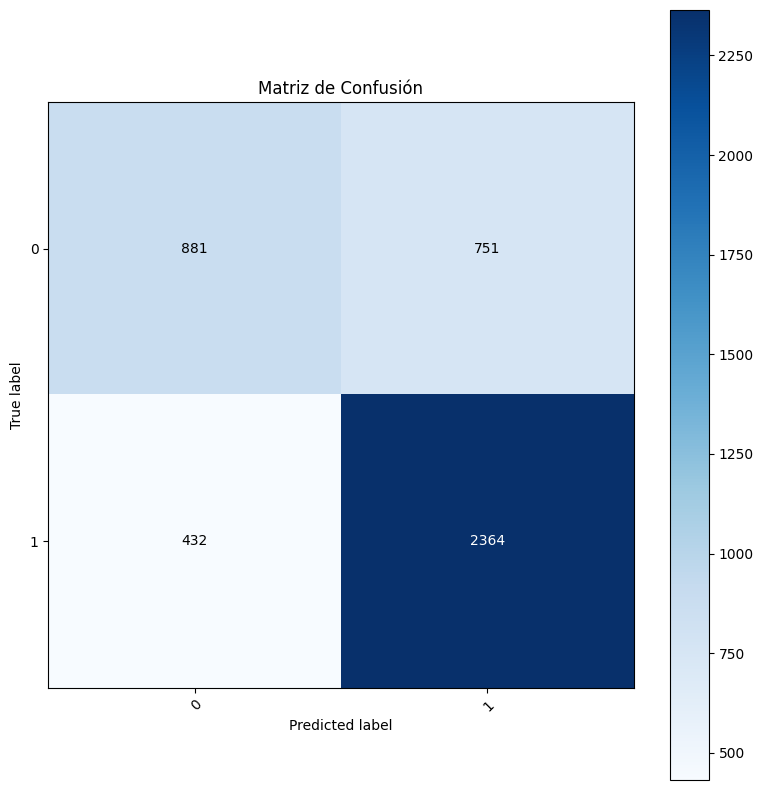

In [ ]:
%matplotlib inline
plot_confusion_matrix(y_true=Y_train, y_pred=y_pred_train, classes=[0,1], title='Matriz de Confusión')

La matriz pero ahora normalizada:

Normalized confusion matrix


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

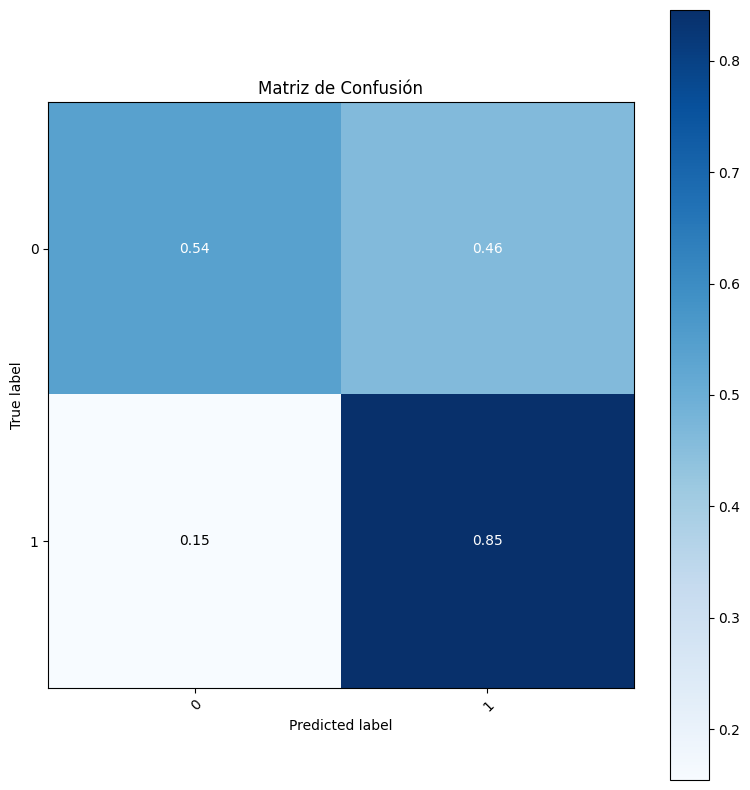

In [ ]:
%matplotlib inline
plot_confusion_matrix(y_true=Y_train, y_pred=y_pred_train, classes=[0,1], normalize=True, title='Matriz de Confusión')

### 3.1.2. Rendimientos.

Verificamos los rendimientos en entrenamiento:

In [ ]:
train_report = classification_report(Y_train, y_pred_train)
print("Train Report for Logistic Regression\n", train_report)

Train Report for Logistic Regression
               precision    recall  f1-score   support

           0       0.67      0.54      0.60      1632
           1       0.76      0.85      0.80      2796

    accuracy                           0.73      4428
   macro avg       0.71      0.69      0.70      4428
weighted avg       0.73      0.73      0.73      4428



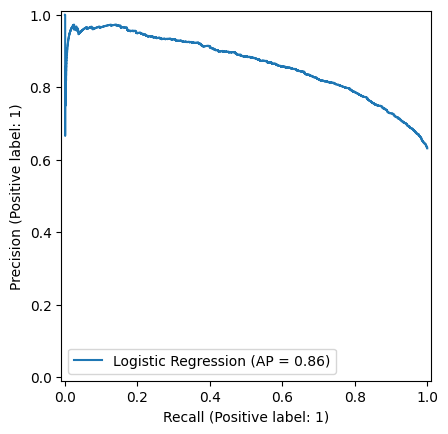

In [ ]:
%matplotlib inline
PrecisionRecallDisplay.from_estimator(pipe_bm, X_train, Y_train, name="Logistic Regression")
plt.show()

Veamos de forma comparativa los rendimientos: en test

In [ ]:
y_pred_test = pipe_bm.predict(X_test)
y_pred_test

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
test_report = classification_report(Y_test, y_pred_test)
print("Test Report for Logistic Regression\n", test_report)

Test Report for Logistic Regression
               precision    recall  f1-score   support

           0       0.69      0.57      0.62       479
           1       0.76      0.84      0.80       772

    accuracy                           0.74      1251
   macro avg       0.73      0.71      0.71      1251
weighted avg       0.73      0.74      0.73      1251



¿Qué opinas sobre los rendimientos?, ¿está sobre ajustado?

### 3.2 Busqueda de Hiperparámetros

Con miras a la búsqueda de hiperparámetros, vamos a construir un gráfico de validación para el hiperparámetro C, el cuál corresponde al valor inverso de la regularización.

Debes tener en cuenta que los valores deben variar en orden de magnitud (logaritmo), por esta razón nos apoyaremos de la función logspace . Normalmente estos valores varían entre 0.01 y 100.

Teniendo en cuenta lo anterior, los parámetros que tendremos en cuenta son los siguientes:

`np.logspace(start, stop, num)`

Si quisiéramos generar 10 valores que van desde 0.01 ($10^-1$) hasta 100 ($10^2$.), los parámetros deberían ser los siguientes:

`start: -1`
`stop: 2`
`num: 10`

In [ ]:
c_values = np.logspace(-1, 2, 10)
c_values

array([  0.1       ,   0.21544347,   0.46415888,   1.        ,
         2.15443469,   4.64158883,  10.        ,  21.5443469 ,
        46.41588834, 100.        ])

In [ ]:
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ]
)

cat_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, make_column_selector(dtype_exclude=object)),
        ("cat", cat_transformer, make_column_selector(dtype_include=object))
    ]
)

estimators = [
    ('transform', preprocessor),
    ('regression', LogisticRegression(max_iter=5000))
]

pipe_val = Pipeline(estimators)

In [ ]:
train_scores, val_scores = validation_curve(estimator=pipe_val,
                                            X=X_train,
                                            y=Y_train,
                                            param_name='regression__C',
                                            param_range=c_values,
                                            scoring='accuracy',
                                            cv=10)

Para graficar estos valores, obtendremos la media y desviación estándar para los conjuntos de entrenamiento y validación generados en la validación cruzada:

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

Finalmente, vamos a visualizar la curva de validación utilizando `matplotlib`:

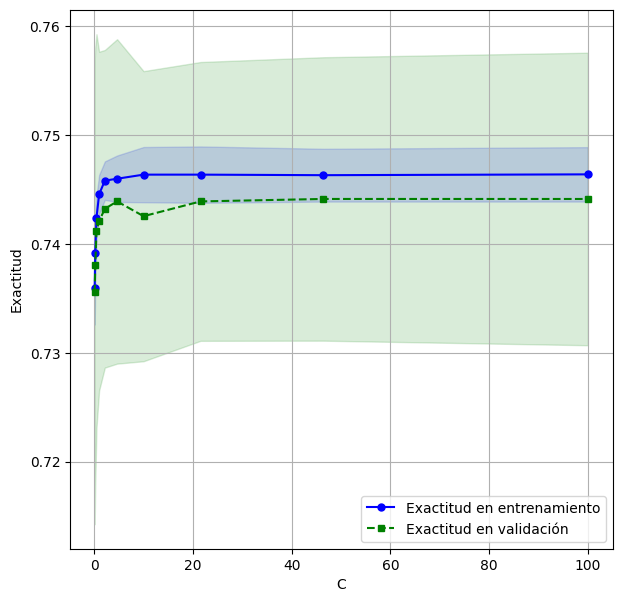

In [ ]:
# Inicializamos la figura
plt.figure(figsize=(7,7))

# Creamos la curva de validación para el conjunto de entrenamiento
plt.plot(c_values, train_mean, color='blue', marker='o', markersize=5, label='Exactitud en entrenamiento')
plt.fill_between(c_values, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')

# Creamos la curva de validación para el conjunto de validación
plt.plot(c_values, val_mean, color='green', linestyle='--', marker='s', markersize=5, label='Exactitud en validación')
plt.fill_between(c_values, val_mean+val_std, val_mean-val_std, alpha=0.15, color='green')

# Agregamos una grilla y etiquetas para los ejes
plt.grid(True)
plt.legend(loc='lower right')
plt.xlabel('C')
plt.ylabel('Exactitud')
plt.show()

Un posible criterio de selección del mejor valor es alquel cuya exactitud es el valor más alto en el conjunto de datos. Utilizando `np.argmax()`, podemos obtener el índice de `val_mean` en el que se encuentra el valor más alto:

In [ ]:
best_index = np.argmax(val_mean)
best_index

8

Como el valor obtenido es un índice, podemos obtener el valor del elemento correspondiente de la lista:

In [ ]:
best_c = c_values[best_index]
best_c

46.41588833612777

Construimos el pipeline para la búsqueda de los hiperparámetros:

In [ ]:
num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ]
)

cat_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, make_column_selector(dtype_exclude=object)),
        ("cat", cat_transformer, make_column_selector(dtype_include=object))
    ]
)

estimators = [
    ('transform', preprocessor),
    ('regression', LogisticRegression())
]

pipe_new = Pipeline(estimators)

parameters = {
    'transform__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    'transform__cat': [OneHotEncoder(handle_unknown='ignore'), 'passthrough'],
    'regression__C': [0.01, 0.1, 1, 10, 46, 50, 100]
}

grid_search = GridSearchCV(pipe_new, parameters, verbose=2, scoring='precision', cv=5)

In [ ]:
%%time
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.1s
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total tim

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=0.01, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.2s
[CV] END regression__C=0.01, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=0.01, transform__cat=passthrough, transform__num=MinMaxScaler()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=0.1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=0.1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=0.1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=0.1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=0.1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=0.1, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.1, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.1, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.1, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.1, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=0.1, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=0.1, transform__cat=passthrough, transform__num=MinMaxScaler(); total t

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=1, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=1, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=1, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=1, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=1, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=1, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=1, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=1, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=1, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=1, tran

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=10, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=10, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=10, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=10, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=10, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=10, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=10, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=10, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=46, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=46, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=46, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=46, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=46, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=46, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=46, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=46, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=46, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=46, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=46, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=46, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=50, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=50, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s
[CV] END regression__C=50, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=50, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=50, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=50, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=50, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=50, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=50, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=50, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=50, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=50, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=50, transform__cat=pas

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.2s
[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.2s
[CV] END regression__C=100, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=passthrough; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END regression__C=100, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=100, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=100, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=100, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=100, transform__cat=passthrough, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__C=100, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=100, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=100, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=100, transform__cat=passthrough, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END regression__C=100, transfor

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
105 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7d32079dbb50>),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7d32079d8e90>)])),
                                       ('regression', LogisticRegression())]),
             param_grid={'regression__C': [0.01, 0.1, 1, 10, 46, 50, 100],
                         'transform__cat': [OneHotEncoder(handle_unknown='ignore'),
                                            'passthrough'],
                         'transform__num': [StandardScaler(), MinMaxScaler(),
                                            'passthrough']},
             scoring='precision', verbose=2)

In [ ]:
best_model = grid_search.best_estimator_

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regression__C,param_transform__cat,param_transform__num,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023806,0.003432,0.010725,0.000834,0.01,OneHotEncoder(handle_unknown='ignore'),StandardScaler(),"{'regression__C': 0.01, 'transform__cat': OneH...",0.756494,0.769726,0.761983,0.766091,0.744150,0.759689,0.008929,14
1,0.021928,0.006793,0.013845,0.004808,0.01,OneHotEncoder(handle_unknown='ignore'),MinMaxScaler(),"{'regression__C': 0.01, 'transform__cat': OneH...",0.645012,0.638030,0.648873,0.643772,0.641292,0.643396,0.003632,21
2,0.099654,0.029675,0.011369,0.001556,0.01,OneHotEncoder(handle_unknown='ignore'),passthrough,"{'regression__C': 0.01, 'transform__cat': OneH...",0.712308,0.708275,0.737500,0.716547,0.710949,0.717116,0.010537,20
3,0.012307,0.001651,0.000000,0.000000,0.01,passthrough,StandardScaler(),"{'regression__C': 0.01, 'transform__cat': 'pas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
4,0.008825,0.000852,0.000000,0.000000,0.01,passthrough,MinMaxScaler(),"{'regression__C': 0.01, 'transform__cat': 'pas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
5,0.006693,0.001185,0.000000,0.000000,0.01,passthrough,passthrough,"{'regression__C': 0.01, 'transform__cat': 'pas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
6,0.030384,0.004513,0.011301,0.001285,0.10,OneHotEncoder(handle_unknown='ignore'),StandardScaler(),"{'regression__C': 0.1, 'transform__cat': OneHo...",0.774194,0.782753,0.771721,0.768740,0.762739,0.772029,0.006586,10
7,0.022537,0.000886,0.011610,0.001221,0.10,OneHotEncoder(handle_unknown='ignore'),MinMaxScaler(),"{'regression__C': 0.1, 'transform__cat': OneHo...",0.728943,0.745098,0.727964,0.743741,0.724744,0.734098,0.008552,19
8,0.074316,0.007626,0.010523,0.001456,0.10,OneHotEncoder(handle_unknown='ignore'),passthrough,"{'regression__C': 0.1, 'transform__cat': OneHo...",0.752883,0.755906,0.746774,0.758942,0.733129,0.749527,0.009133,18
9,0.011327,0.001106,0.000000,0.000000,0.10,passthrough,StandardScaler(),"{'regression__C': 0.1, 'transform__cat': 'pass...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22


In [ ]:
grid_search.best_params_

{'regression__C': 46,
 'transform__cat': OneHotEncoder(handle_unknown='ignore'),
 'transform__num': StandardScaler()}

In [ ]:
best_model.predict_proba(X_test)

array([[0.69766407, 0.30233593],
       [0.4718816 , 0.5281184 ],
       [0.31343025, 0.68656975],
       ...,
       [0.7849454 , 0.2150546 ],
       [0.56639509, 0.43360491],
       [0.17787429, 0.82212571]])

### 3.3 Evaluación del Modelo


In [ ]:
print("Test Report for Logistic Regression\n", classification_report(Y_test, best_model.predict(X_test)))

Test Report for Logistic Regression
               precision    recall  f1-score   support

           0       0.69      0.58      0.63       479
           1       0.76      0.83      0.80       772

    accuracy                           0.74      1251
   macro avg       0.73      0.71      0.71      1251
weighted avg       0.73      0.74      0.73      1251



Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

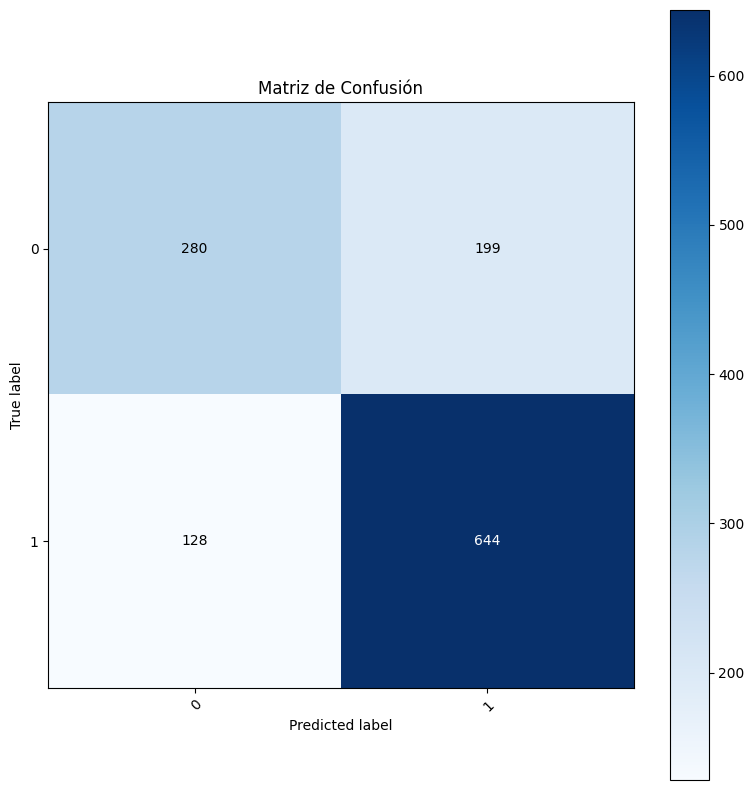

In [ ]:
plot_confusion_matrix(y_true=Y_test, y_pred= best_model.predict(X_test), classes=[0,1],
                      title='Matriz de Confusión')

In [ ]:
y_pred_test = best_model.predict(X_test)
y_pred_test

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
print("Test Report for Logistic Regression\n", classification_report(Y_test, y_pred_test))

Test Report for Logistic Regression
               precision    recall  f1-score   support

           0       0.69      0.58      0.63       479
           1       0.76      0.83      0.80       772

    accuracy                           0.74      1251
   macro avg       0.73      0.71      0.71      1251
weighted avg       0.73      0.74      0.73      1251



# 4. Preguntas

- ¿Qué modelo tiene mejor rendimiento, el inicial o el resultante de hiperparámetros?
- ¿Consideras que se requiere alguna modificación al proceso de preparación de los datos?
- ¿El gráfico de validación fue útil para la búsqueda de hiperparámetros?.
- ¿Qué otros hiperparámetros deberíamos buscar para esta situación?.
- ¿Que otros tipos de algoritmos de clasificación nos podrían servir para resolver este problema?.
- ¿Cómo resolverías este problema en el contexto de una regresión logística multiclase?